## Observations and Insights
#### Add your analysis here
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
combined_mouse_metadata = pd.merge(study_results, mouse_metadata, on='Mouse ID', how="outer",)
# Display the data table for preview
combined_mouse_metadata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Check the number of mice.
combined_mouse_metadata["Mouse ID"].nunique()

249

In [62]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_duplicate = combined_mouse_metadata[combined_mouse_metadata.duplicated(["Mouse ID","Timepoint"], keep =False)]
mice_duplicate["Mouse ID"].unique()

array(['g989'], dtype=object)

In [63]:
# Optional: Get all the data for the duplicate mouse ID.
combined_mouse_metadata[combined_mouse_metadata["Mouse ID"] == mice_duplicate["Mouse ID"].unique()[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mouse_metadata_clear = combined_mouse_metadata.copy()
# Delete these row indexes from dataFrame
indexNames = combined_mouse_metadata_clear[combined_mouse_metadata_clear['Mouse ID'] == mice_duplicate["Mouse ID"].unique()[0]].index
combined_mouse_metadata_clear.drop(indexNames,inplace=True)
# Check the number of mice in the clean DataFrame.
print(combined_mouse_metadata_clear["Mouse ID"].nunique())

248


## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use this straighforward method, create multiple series and put them all in a dataframe at the end.
#sort the data by Drug Regimen column
combined_mouse_metadata_clear = combined_mouse_metadata_clear.sort_values(["Drug Regimen"], ascending=True)
# obtain the column name
drug_regimen = combined_mouse_metadata_clear["Drug Regimen"].unique()
# initial 5 list for mean, median, variance, standard deviation, and SEM
drug_regimen_mean = []
drug_regimen_median  = []
drug_regimen_variance  = []
drug_regimen_std  = []
drug_regimen_sem  = []

#loop each Regimen in the dataframe
for tem_row in drug_regimen:
    drug_regimen_mean.append(combined_mouse_metadata_clear[combined_mouse_metadata_clear["Drug Regimen"] == tem_row]["Tumor Volume (mm3)"].mean())
    drug_regimen_median.append(combined_mouse_metadata_clear[combined_mouse_metadata_clear["Drug Regimen"] == tem_row]["Tumor Volume (mm3)"].median())
    drug_regimen_variance.append(combined_mouse_metadata_clear[combined_mouse_metadata_clear["Drug Regimen"] == tem_row]["Tumor Volume (mm3)"].var())
    drug_regimen_std.append(combined_mouse_metadata_clear[combined_mouse_metadata_clear["Drug Regimen"] == tem_row]["Tumor Volume (mm3)"].std())
    drug_regimen_sem.append(combined_mouse_metadata_clear[combined_mouse_metadata_clear["Drug Regimen"] == tem_row]["Tumor Volume (mm3)"].sem())
#create a new dataframe for display
summary_statistics = pd.DataFrame({
                            "Drug Regimen": drug_regimen,
                            "Mean Tumor Volume": drug_regimen_mean,
                           "Median Tumor Volume": drug_regimen_median, 
                           "Tumor Volume Variance": drug_regimen_variance, 
                           "Tumor Volume Std. Dev.": drug_regimen_std,
                            "Tumor Volume Std. Err.": drug_regimen_sem       
                                   })
# Format cell
summary_statistics.style.format({'Mean Tumor Volume':'{:,.6f}',
                                 'Median Tumor Volume': '{:,.6f}',
                                 'Tumor Volume Variance': '{:,.6f}',
                                 'Tumor Volume Std. Dev.': '{:,.6f}',
                                 'Tumor Volume Std. Err.': '{:,.6f}'                              
                                })
#reset index for new dataframe
summary_statistics.set_index("Drug Regimen")

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use method to produce everything with a single groupby function

#groupby Drug Regimen
combined_mouse_group = combined_mouse_metadata_clear.groupby("Drug Regimen")

# aggredate mean, median, variance, standard deviation, and SEM
combined_mouse_mean=combined_mouse_group["Tumor Volume (mm3)"].mean()
combined_mouse_median=combined_mouse_group["Tumor Volume (mm3)"].median()
combined_mouse_var=combined_mouse_group["Tumor Volume (mm3)"].var()
combined_mouse_std=combined_mouse_group["Tumor Volume (mm3)"].std()
combined_mouse_sem=combined_mouse_group["Tumor Volume (mm3)"].sem()
#create a new dataframe for display
summary_statistics = pd.DataFrame({"Mean": combined_mouse_mean,
                           "Median": combined_mouse_median, 
                           "Var": combined_mouse_var, 
                           "std": combined_mouse_std,
                            "sem": combined_mouse_sem       
                                   })
# Format cell
summary_statistics.style.format({'Mean Tumor Volume':'{:,.6f}',
                                 'Median Tumor Volume': '{:,.6f}',
                                 'Tumor Volume Variance': '{:,.6f}',
                                 'Tumor Volume Std. Dev.': '{:,.6f}',
                                 'Tumor Volume Std. Err.': '{:,.6f}'                              
                                })

,Mean,Median,Var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

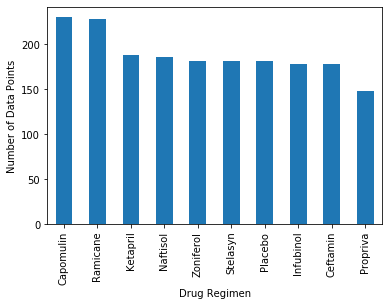

<Figure size 432x288 with 0 Axes>

In [69]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#groupby Drug Regimen
combined_mouse_group = combined_mouse_metadata_clear.groupby("Drug Regimen")
#count the number of experiment 
plot_makers =combined_mouse_group["Timepoint"].count()
#pandas plot
count_chart = plot_makers.sort_values(ascending=False ).plot(kind='bar', figsize=(6,4))
#set chart title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
#show chart and set layout
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number of Data Points')

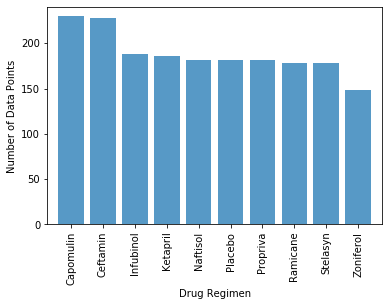

In [70]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#groupby Drug Regimen
counts_data = combined_mouse_group["Timepoint"].count()
counts_data = np.sort(counts_data)[::-1]
x_axis = combined_mouse_group["Timepoint"].count().index
#pyplot
plt.bar(x_axis, counts_data, alpha=0.75, align="center" )
plt.xticks( rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(counts_data)+10)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

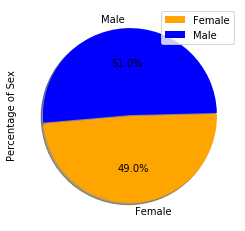

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
combined_mouse_group = combined_mouse_metadata_clear.groupby("Sex")
sex_data = combined_mouse_group["Mouse ID"].count()
summary_statistics = pd.DataFrame(sex_data)
summary_statistics["Percentage of Sex"] = round(sex_data/sex_data.sum(),2)
colors = [ 'orange', 'blue']
explode = (0.01, 0)
#pandas plot
plot = summary_statistics.plot.pie(figsize=(4,4), 
        y = "Percentage of Sex",colors = colors, startangle=185, 
        explode = explode, shadow = True, autopct="%1.1f%%")

Text(0.5, 1.0, 'Sex')

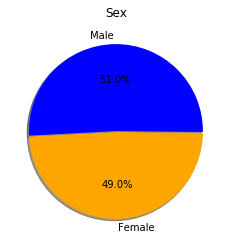

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
combined_mouse_group = combined_mouse_metadata_clear.groupby("Sex")
sex_data = combined_mouse_group["Mouse ID"].count()

# Labels for the sections of our pie chart
labels = sex_data.index
# The values of each section of the pie chart
sizes = round(sex_data/sex_data.sum(),2)
# The colors of each section of the pie chart
colors = ["orange","blue"]
explode = (0.01, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=183)
plt.title("Sex")

## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#groupby mouse id and sort the timepoint by descending
most_promising_group=combined_mouse_metadata_clear.sort_values(["Timepoint"],ascending=False).groupby(["Mouse ID"])
#first() getting the last (greatest) timepoint for each mouse
summary_statistics = pd.DataFrame({"Timepoint": most_promising_group.first()["Timepoint"],
                           "Tumor Volume (mm3)": most_promising_group.first()["Tumor Volume (mm3)"], 
                           "Metastatic Sites": most_promising_group.first()["Metastatic Sites"], 
                           "Drug Regimen": most_promising_group.first()["Drug Regimen"],
                            "Sex": most_promising_group.first()["Sex"], 
                            "Age_months": most_promising_group.first()["Age_months"],                                     
                            "Weight (g)": most_promising_group.first()["Weight (g)"],                                     
                                   })
# remove the index
summary_statistics.reset_index(drop=False)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [75]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []
for treatment in treatment_list:
    tumor_vol_list.append(combined_mouse_metadata_clear[combined_mouse_metadata_clear["Drug Regimen"] == treatment]["Tumor Volume (mm3)"])

i = 0
# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for tumor_volume  in tumor_vol_list:
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset to tumor volume data list
# Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,2)
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{treatment_list[i]}'s lower quartile of Tumor Volume is: {round(lowerq,2)}")
    print(f"{treatment_list[i]}'s upper quartile of Tumor Volume is: {round(upperq,2)}")
    print(f"{treatment_list[i]}'s interquartile range of Tumor Volume is: {round(iqr,2)}")
    print(f"{treatment_list[i]}'s the median of Tumor Volume is: {round(quartiles[0.5],2)} ")
    
    if (lower_bound > tumor_volume.min()):
        print(f"There is at least 1 outlier lower than lower bound at {treatment_list[i]}.")   
    elif (upper_bound < tumor_volume.max()):
        print(f"There is at least 1 outlier greater than upper bound at {treatment_list[i]}.")
    else:
        print(f"There are no outliers at {treatment_list[i]}.")
    i+=1
    print("-------------------------------------------------------------------")


Capomulin's lower quartile of Tumor Volume is: 37.69
Capomulin's upper quartile of Tumor Volume is: 45.0
Capomulin's interquartile range of Tumor Volume is: 7.31
Capomulin's the median of Tumor Volume is: 41.56 
There is at least 1 outlier lower than lower bound at Capomulin.
-------------------------------------------------------------------
Ramicane's lower quartile of Tumor Volume is: 36.67
Ramicane's upper quartile of Tumor Volume is: 45.0
Ramicane's interquartile range of Tumor Volume is: 8.33
Ramicane's the median of Tumor Volume is: 40.67 
There is at least 1 outlier lower than lower bound at Ramicane.
-------------------------------------------------------------------
Infubinol's lower quartile of Tumor Volume is: 47.31
Infubinol's upper quartile of Tumor Volume is: 57.31
Infubinol's interquartile range of Tumor Volume is: 10.0
Infubinol's the median of Tumor Volume is: 51.82 
There are no outliers at Infubinol.
------------------------------------------------------------------

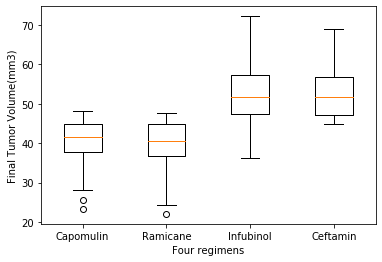

In [76]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Four regimens')
ax1.set_ylabel('Final Tumor Volume(mm3)')
ax1.boxplot(tumor_vol_list)
ax1.set_xticklabels(treatment_list)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mousel509')

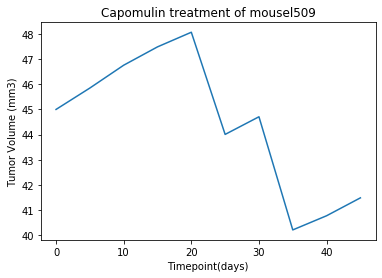

In [77]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#fill a new dataframe of Capomulin for mice l509 
capomulin_mousel509 = combined_mouse_metadata_clear[(
    combined_mouse_metadata_clear["Drug Regimen"] == "Capomulin") & 
    (combined_mouse_metadata_clear["Mouse ID"] == "l509")]
#sort by Timepoint
capomulin_mousel509 = capomulin_mousel509.sort_values(["Timepoint"], ascending=True)

mouse_1_vol = (capomulin_mousel509['Tumor Volume (mm3)'].to_list())
mouse_1_time = (capomulin_mousel509['Timepoint'].to_list())
plt.plot(mouse_1_time, mouse_1_vol)
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mousel509")

Text(0.5, 0, 'Weight (g)')

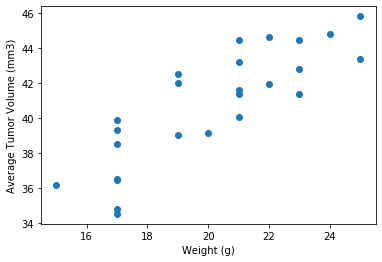

In [78]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#find Capomulin's dataframe
mouse_sub_list = combined_mouse_metadata_clear[combined_mouse_metadata_clear['Drug Regimen'] == 'Capomulin']
#groupby Mouse ID and get mean 
mouse_sub_list_group = mouse_sub_list.groupby("Mouse ID")
mouse_sub_list_weight = mouse_sub_list_group["Weight (g)"].mean()
mouse_sub_list_avg_vol = mouse_sub_list_group["Tumor Volume (mm3)"].mean()
plt.scatter(mouse_sub_list_weight, mouse_sub_list_avg_vol)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


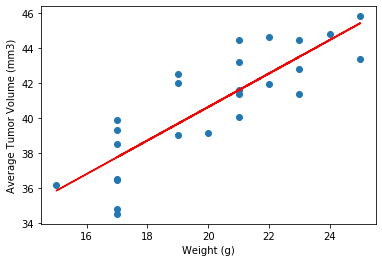

In [79]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_sub_list_weight
y_values = mouse_sub_list_avg_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()